# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Predict Price of Used Cars**

This project aims to predict the price of used cars using machine learning models. The dataset, originally available on Kaggle, by using the model the goal is also to let know the business as to what the customers look for when makinga a decision on buying used Cars.

Some of the key Features included in the dataset are:

*  Manufaturer (eg : Tesla,BMW)
*  Odometer (Mileage)
*  Tile Status (eg: Clean,Salvage)
*  Drive (eg: fwd,rwd,4wd)
*  Year
*  fuel (eg:gas,electric)
*  condition (eg:like new,good,fair)
*  Type (eg: Sedan, SUV)
*  Transmission (eg: Manual,Others)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
vehicle_df = pd.read_csv('data/vehicles.csv')

In [182]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [183]:
vehicle_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


Summary for numerical data column values

In [184]:
vehicle_df[['odometer','price']].describe().round(2)

,odometer,price
count,422480.00,4.268800e+05
mean,98043.33,7.519903e+04
std,213881.50,1.218228e+07
min,0.00,0.000000e+00
25%,37704.00,5.900000e+03
50%,85548.00,1.395000e+04
75%,133542.50,2.648575e+04
max,10000000.00,3.736929e+09


In [185]:
# Making a list of all categorical variables
cat_col = vehicle_df.select_dtypes(include='object').columns.tolist()
# Printing number of count of each unique value in each column
for column in cat_col:
    print(vehicle_df[column].value_counts())
    print("#" * 40)

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
########################################
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               542

** Observations **
* The dataset has state and region and will have less effect on pricing as per my analysis.
* As the price prediction is based on Cars - There are other Vehicle types that are available other than "Sedan".
* VIN attribute seems to have duplicates from the initial analysis.
* Price Value has some data where in it looks like it has some outliers for e.g the car is value appromimately for $3B.
* Odometer readings also has 0 which does not align for used cars data.



### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [186]:
# Removing some of the types as they do not belong to Cars Category
used_cars_df = vehicle_df.query('type in ["sedan","SUV","other","coupe","hatchback","wagon","convertible"]')

In [187]:
used_cars_df.shape
print(f"No of Rows in Dataframe: {used_cars_df.shape[0]}")
print(f"No of Columns in Dataframe: {used_cars_df.shape[1]}")


No of Rows in Dataframe: 240734
No of Columns in Dataframe: 18


In [188]:
# Remove id Column
used_cars_df = used_cars_df.drop(columns='id')

In [189]:
# Finding the Number of Duplicates
used_cars_df.duplicated().sum()
print(f"No of Duplicates in Dataframe: {used_cars_df.duplicated().sum()}")

No of Duplicates in Dataframe: 30467


Columns dropped based on their usefulness in predicting the price as well as based on percentage of missing data

In [190]:
# Dropping Duplicates
used_cars_df=used_cars_df.drop_duplicates()
print(f"Rows in Dataframe: {used_cars_df.shape[0]}")

Rows in Dataframe: 210267


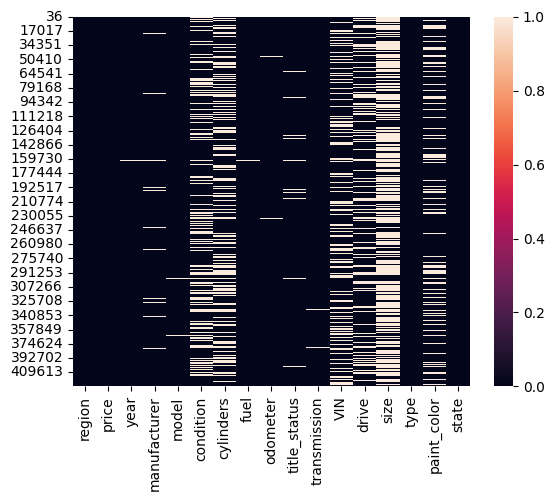

In [191]:
#Plotting of sns heatmap to detect missingness of data
sns.heatmap(used_cars_df.isna());

In [192]:
to_drop = ['region','state','VIN','paint_color','cylinders','size']
used_cars_df = used_cars_df.drop(to_drop, axis=1)

In [193]:
# Check for Null Count
used_cars_df.isna().sum()

,0
price,0
year,451
manufacturer,7132
model,1487
condition,64114
fuel,981
odometer,2185
title_status,4155
transmission,1175
drive,47968


In [194]:
# Remove data when 30% of the column values are null
threshold=used_cars_df.shape[1]/3
cars_clean_df = used_cars_df[used_cars_df.isnull().sum(axis=1)<=threshold]
cars_clean_df.shape
print(f"Rows in Dataframe: {cars_clean_df.shape[0]}")

Rows in Dataframe: 209887


Imputing "condition" column based on odometer values

In [195]:
cars_clean_df.loc[:, 'condition'] = np.where(
    (cars_clean_df['odometer'].isnull()) & (cars_clean_df['condition'].isnull()), 'unknown',
    np.where(
        (cars_clean_df['odometer'] < 5000) & (cars_clean_df['condition'].isnull()), 'like new',
        np.where(
            (cars_clean_df['odometer'] >= 5000) & (cars_clean_df['odometer'] < 15000) & (cars_clean_df['condition'].isnull()), 'good',
            np.where(
                (cars_clean_df['odometer'] >= 15000) & (cars_clean_df['condition'].isnull()), 'fair',
                cars_clean_df['condition']
            )
        )
    )
)

In [196]:
cars_clean_df.isna().sum()

,0
price,0
year,207
manufacturer,6820
model,1484
condition,0
fuel,930
odometer,2082
title_status,4035
transmission,1063
drive,47688


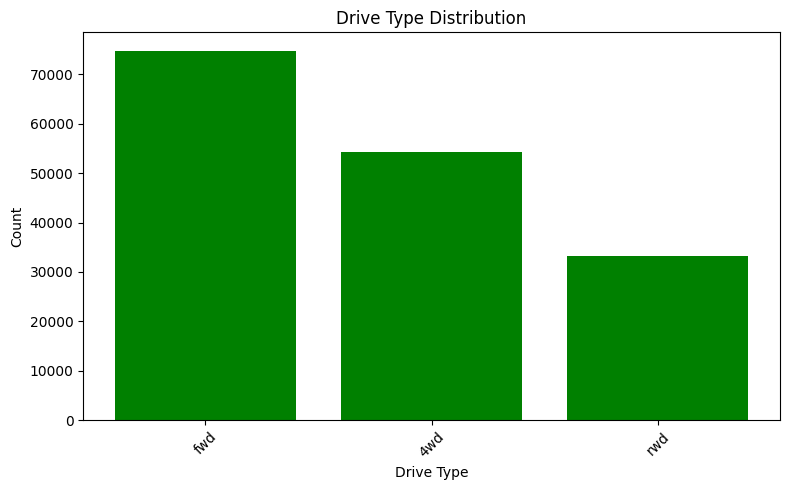

In [197]:
drive_counts=cars_clean_df['drive'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(drive_counts.index, drive_counts.values, color='green')
plt.title('Drive Type Distribution')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [198]:
# Updating the drive to "fwd" based on mode() value
cars_clean_df.loc[:,'drive']=cars_clean_df['drive'].fillna('fwd')

In [199]:
# Removing Rows from Clean Cars having missing values that account for less that 5%
cars_clean_df= cars_clean_df.dropna()
cars_clean_df.shape
print(f"Rows in Clean Cars: {cars_clean_df.shape[0]}")

Rows in Clean Cars: 193775


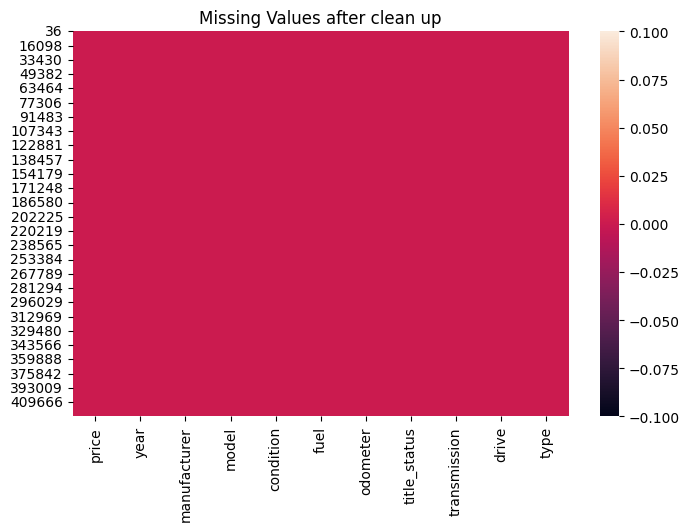

In [200]:
plt.figure(figsize=(8, 5))
sns.heatmap(cars_clean_df.isna());
plt.title('Missing Values after clean up');

In [201]:
# Statistics for the data frame after clean up
cars_clean_df.describe().round(2)

,price,year,odometer
count,1.937750e+05,193775.00,193775.00
mean,2.526879e+04,2012.33,83963.11
std,3.227736e+06,8.04,144158.60
min,0.000000e+00,1900.00,0.00
25%,6.300000e+03,2010.00,31444.00
50%,1.399500e+04,2014.00,73304.00
75%,2.499000e+04,2017.00,120424.00
max,1.410065e+09,2022.00,10000000.00


In [202]:
# To find the Outliers and Noise
cars_clean_df['price'].sort_values().tail(5)

,price
68935,2000000
105843,6995495
193736,123456789
137807,123456789
184704,1410065407


In [203]:
# Check for Invalid data in Price
cars_clean_df.loc[cars_clean_df['price']<=500].shape
print(f"Rows with Invalid Price data: {cars_clean_df.loc[cars_clean_df['price']<=500].shape[0]}")

Rows with Invalid Price data: 16740


In [204]:
cars_clean_df.loc[cars_clean_df['price']>50000]

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type
158,52990,2020.0,jaguar,e-pace p300 r-dynamic se,good,gas,79.0,clean,other,fwd,other
346,98900,2001.0,ferrari,360 modena,good,gas,20187.0,clean,automatic,rwd,convertible
365,72900,2021.0,chevrolet,tahoe,good,gas,19129.0,clean,automatic,4wd,SUV
452,50990,2017.0,mercedes-benz,s-class,fair,gas,68643.0,clean,automatic,fwd,sedan
461,99950,2021.0,chevrolet,corvette stingray spor,like new,gas,510.0,clean,automatic,rwd,coupe
...,...,...,...,...,...,...,...,...,...,...,...
426267,63990,2019.0,audi,q8 premium sport utility 4d,good,other,20126.0,clean,automatic,fwd,other
426313,55000,1957.0,chevrolet,belair 2dr. sports coupe,excellent,gas,7550.0,clean,automatic,fwd,coupe
426666,56990,2020.0,mercedes-benz,gle 350 sport,good,other,8179.0,clean,other,rwd,SUV
426775,54995,2020.0,mercedes-benz,gle-class,good,gas,14426.0,clean,automatic,4wd,SUV


In [205]:
# Dropping rows with Price = 0
cars_clean_df = cars_clean_df.drop(cars_clean_df[cars_clean_df['price']<=500].index)

In [206]:
# Dropping rows with Prices which are less that 2% - Considering this as outliers
cars_clean_df = cars_clean_df.drop(cars_clean_df[cars_clean_df['price']>=50000.0].index)

In [207]:
# Find bad data in Odometer readings
cars_clean_df['odometer'].sort_values().tail(20)

,odometer
238718,9999999.0
154048,9999999.0
97847,9999999.0
63430,9999999.0
378377,9999999.0
27200,9999999.0
378708,9999999.0
238710,9999999.0
317864,9999999.0
334534,9999999.0


In [208]:
# Finding outliers in odometer reading
cars_clean_df.query('odometer>400000')['odometer'].value_counts()

,count
odometer,
999999.0,27
9999999.0,16
1111111.0,10
1000000.0,7
10000000.0,6
...,...
494850.0,1
1942420.0,1
905000.0,1


In [209]:
# Clean up of Bad Data based on Odometer Readings
cars_clean_df = cars_clean_df.drop(cars_clean_df[cars_clean_df['odometer']>400000].index)

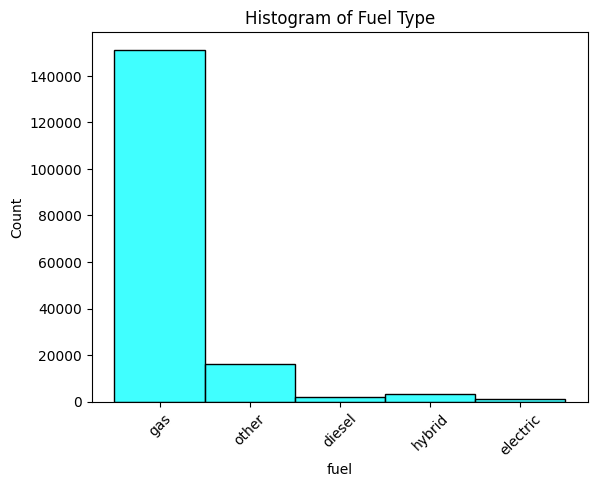

In [210]:
sns.histplot(data=cars_clean_df,x='fuel', color='aqua')
plt.title('Histogram of Fuel Type')
plt.xticks(rotation=45);

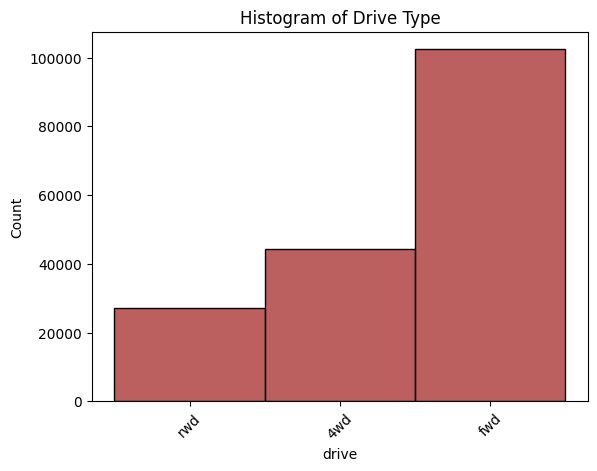

In [211]:
sns.histplot(data=cars_clean_df,x='drive',color='brown')
plt.title('Histogram of Drive Type')
plt.xticks(rotation=45);

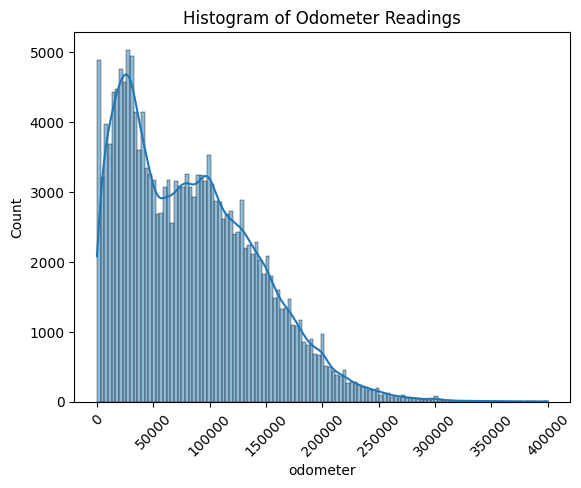

In [212]:
sns.histplot(data=cars_clean_df,x='odometer',kde=True)
plt.title('Histogram of Odometer Readings')
plt.xticks(rotation=45);

In [213]:
# Using to log function on Price as the data was right skewed as well to normalize the price
cars_clean_df['price'] = cars_clean_df['price'].astype(float)
cars_clean_df['price'] = np.log1p(cars_clean_df['price'])

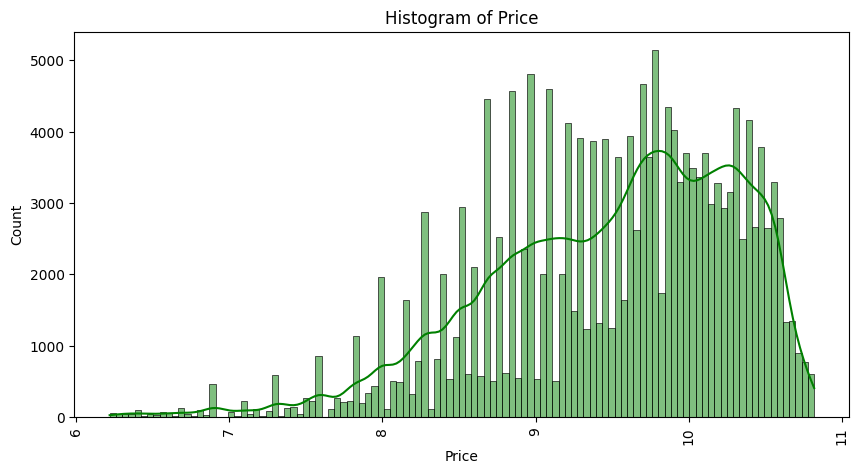

In [214]:
plt.figure(figsize=(10, 5))
sns.histplot(data=cars_clean_df,x='price',kde=True,color='green')
plt.title('Histogram of Price')
plt.xticks(rotation=90)
plt.xlabel('Price');

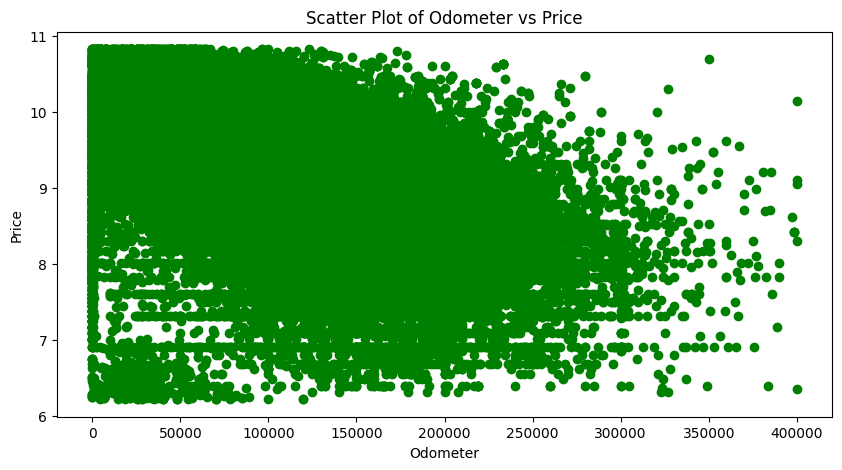

In [215]:
plt.figure(figsize=(10, 5))
plt.scatter(cars_clean_df['odometer'], cars_clean_df['price'], color='green')
plt.title('Scatter Plot of Odometer vs Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

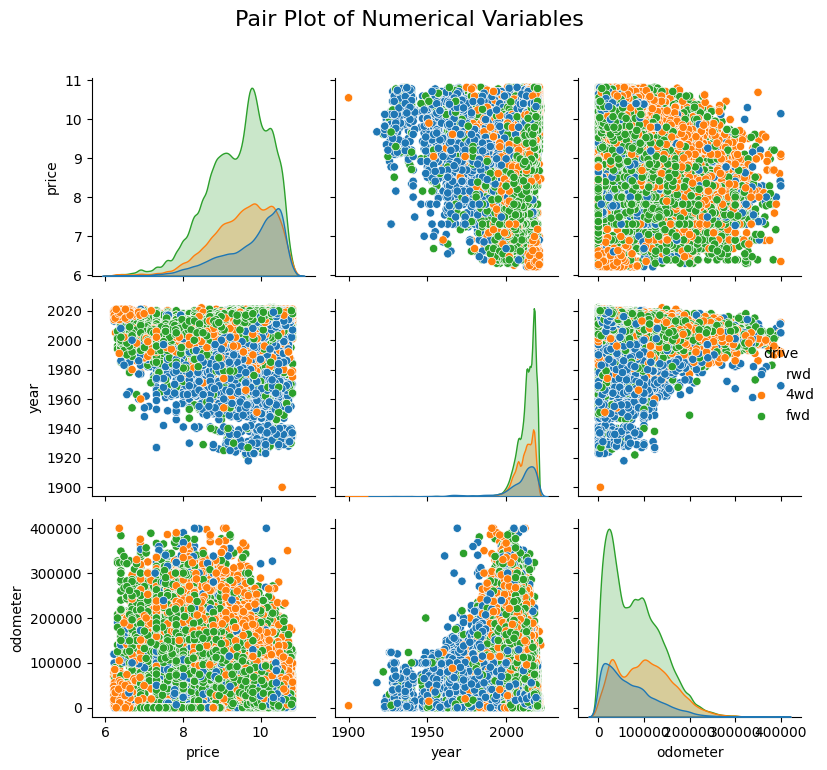

In [216]:
sns.pairplot(cars_clean_df,hue='drive')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16);
plt.tight_layout();

In [217]:
used_cars_df['manufacturer'].nunique()

42

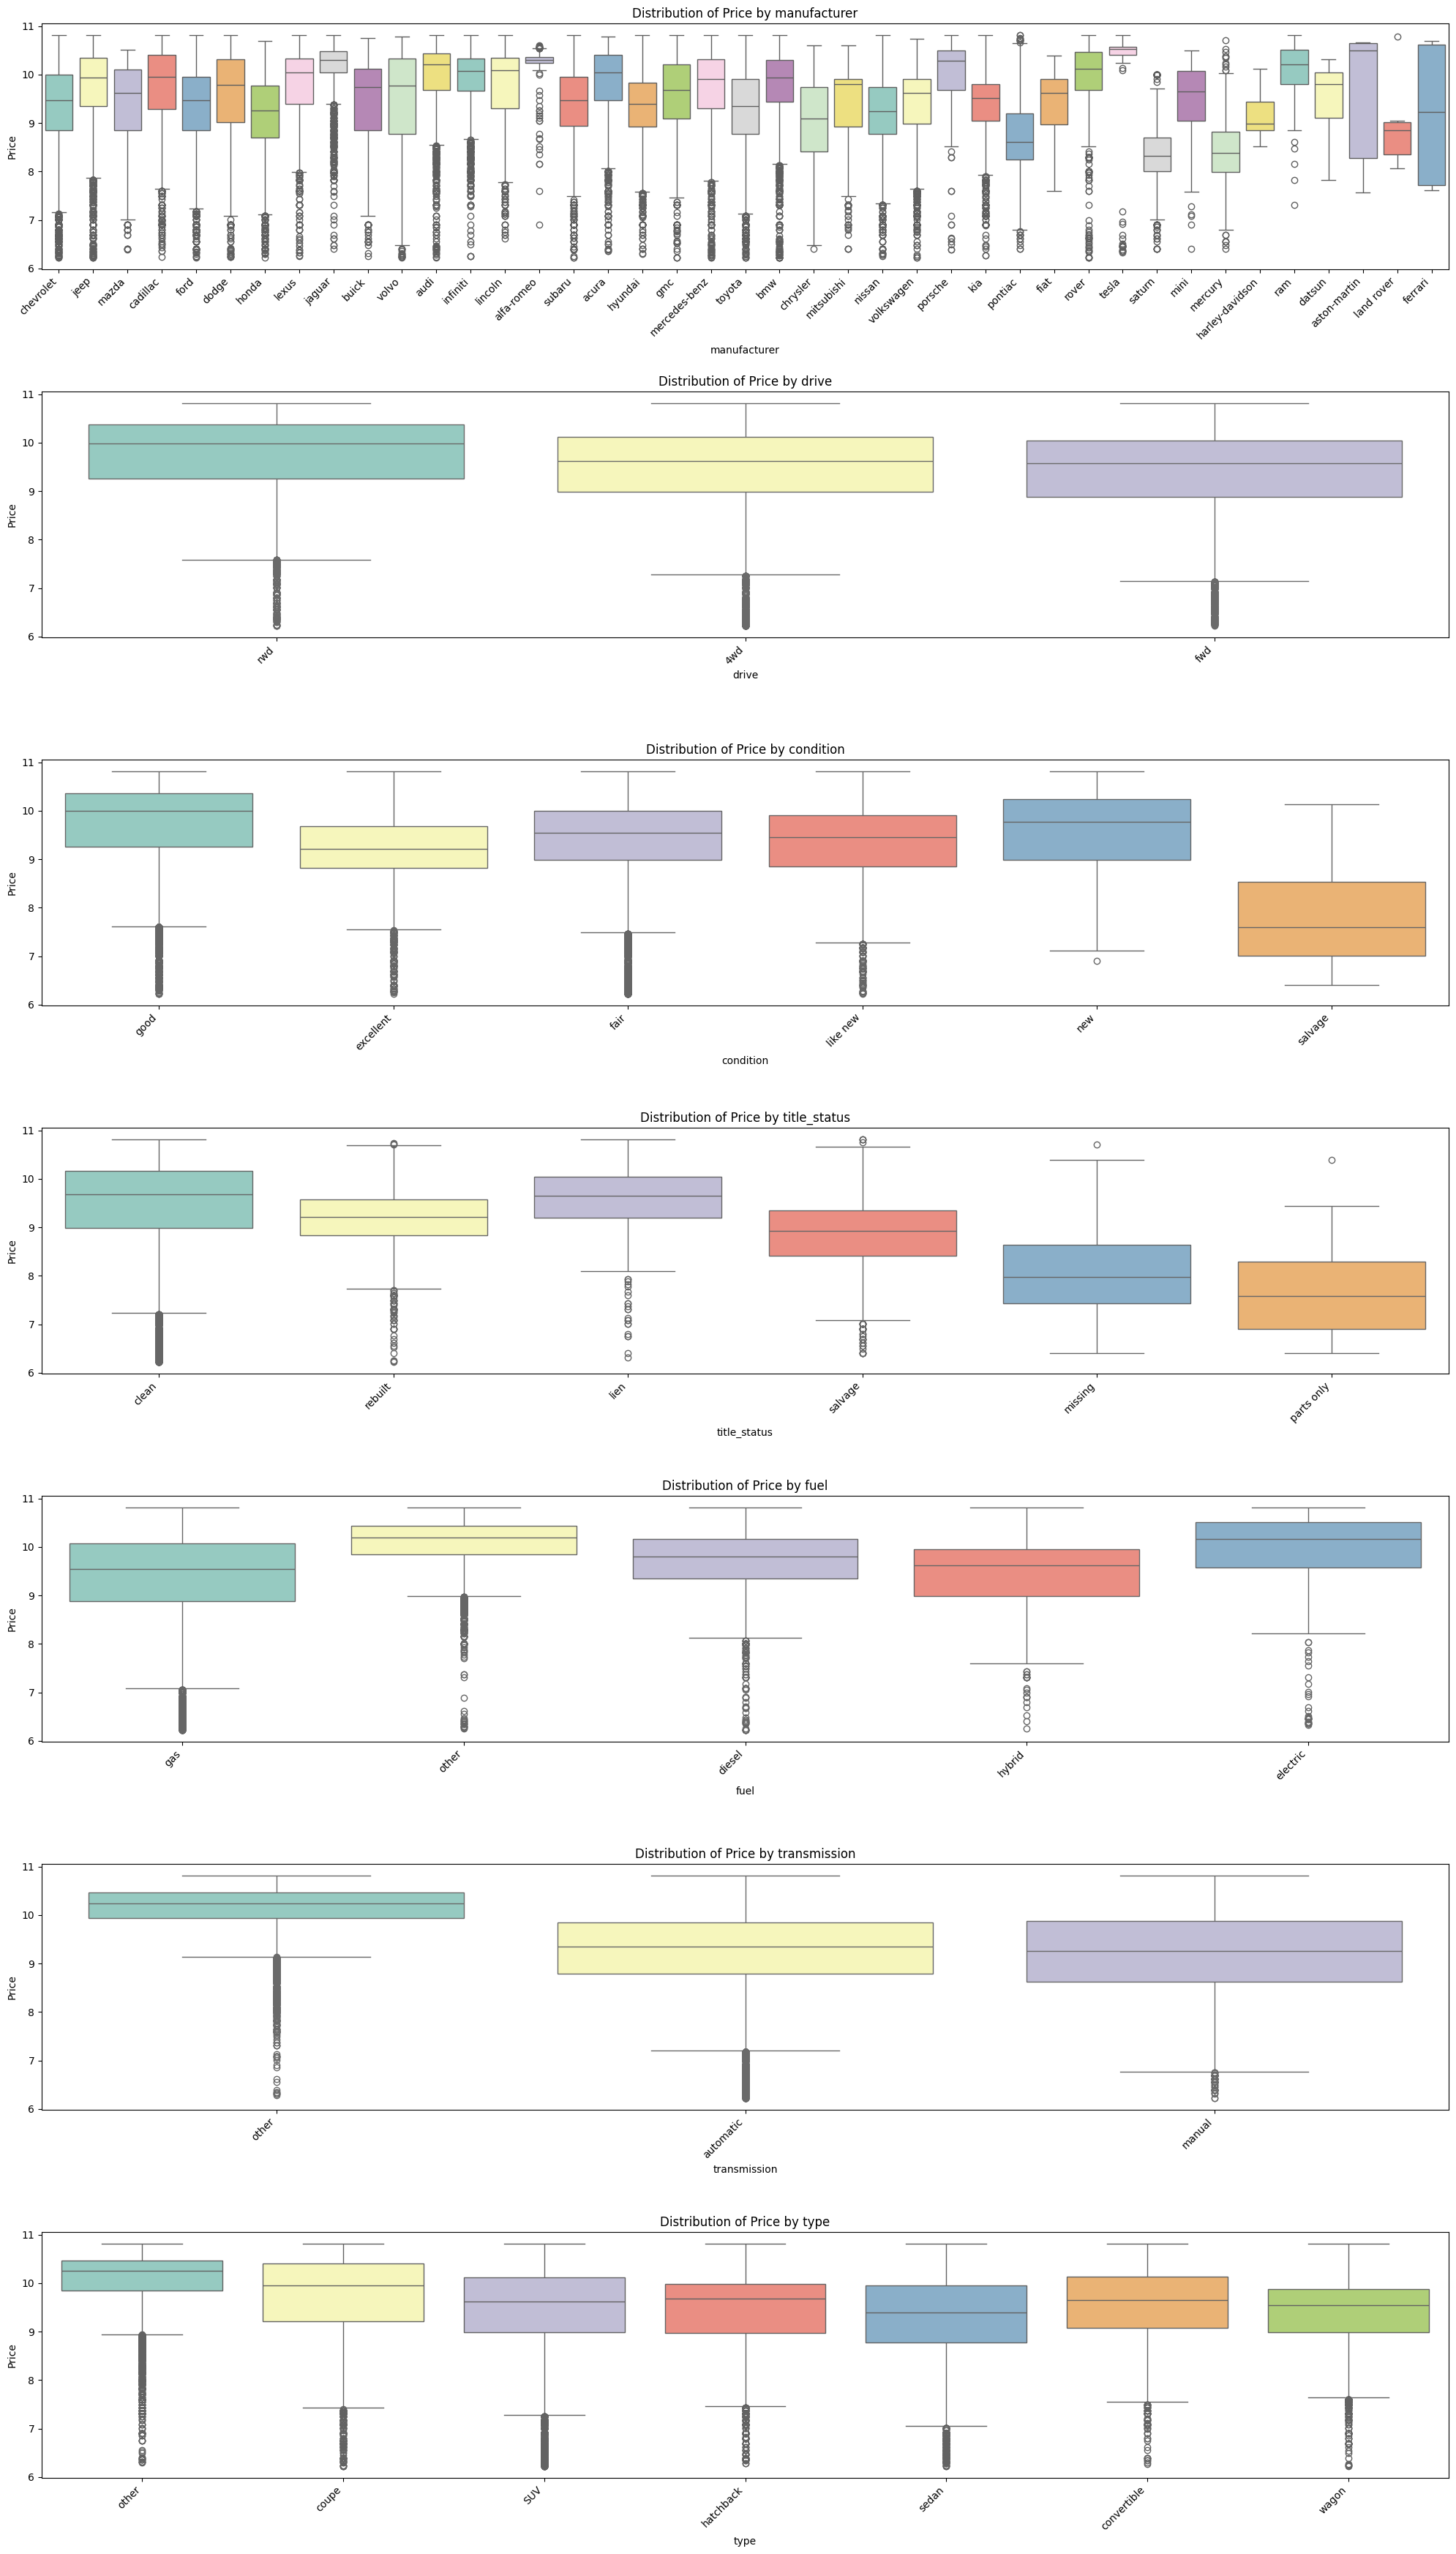

In [218]:
# Select only numerical variables
obj_columns = ['manufacturer','drive','condition','title_status','fuel','transmission','type']
plt.figure(figsize=(20, len(obj_columns) * 5))

for i, col in enumerate(obj_columns, 1):
    plt.subplot(len(obj_columns), 1, i)
    sns.boxplot(data=cars_clean_df, x=col, y='price',hue=col, palette='Set3', dodge=False, legend=False)
    #plt.xticks(rotation=90)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"Distribution of Price by {col}")

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

In [219]:
# Dropping "model" for High Cardinality
cars_clean_df=cars_clean_df.drop('model',axis=1)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from scipy.linalg import svd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn import set_config
set_config(display="diagram")

In [221]:
X=cars_clean_df.drop('price',axis=1).reset_index(drop=True)
y=cars_clean_df['price']
X_encoded=pd.get_dummies(X,drop_first=True)


In [222]:
# Resultset after One Hot Encoding
X_encoded.head()

,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_convertible,type_coupe,type_hatchback,type_other,type_sedan,type_wagon
0,2011.0,30237.0,False,False,False,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False
1,2017.0,30041.0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,2016.0,9704.0,False,False,False,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
3,2020.0,20581.0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2020.0,2195.0,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False


In [223]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174082 entries, 0 to 174081
Data columns (total 66 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   year                          174082 non-null  float64
 1   odometer                      174082 non-null  float64
 2   manufacturer_alfa-romeo       174082 non-null  bool   
 3   manufacturer_aston-martin     174082 non-null  bool   
 4   manufacturer_audi             174082 non-null  bool   
 5   manufacturer_bmw              174082 non-null  bool   
 6   manufacturer_buick            174082 non-null  bool   
 7   manufacturer_cadillac         174082 non-null  bool   
 8   manufacturer_chevrolet        174082 non-null  bool   
 9   manufacturer_chrysler         174082 non-null  bool   
 10  manufacturer_datsun           174082 non-null  bool   
 11  manufacturer_dodge            174082 non-null  bool   
 12  manufacturer_ferrari          174082 non-nul

In [224]:
# Train Test and Split of Data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [225]:
X_train.shape

(121857, 66)

In [226]:
X_test.head()

,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_convertible,type_coupe,type_hatchback,type_other,type_sedan,type_wagon
3713,2001.0,164000.0,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
34102,1999.0,178000.0,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
170777,2011.0,131118.0,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
69977,2017.0,24238.0,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
60826,2013.0,154315.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [227]:
# Training the dataset on Linear Regression Model
results=[]
linreg =LinearRegression().fit(X_train,y_train)
train_preds =linreg.predict(X_train)
test_preds =linreg.predict(X_test)
#coef = linreg.coef_
slope = f"{linreg.coef_[0]:.2f}"
intercept =  f"{linreg.intercept_:.2f}"

mse_train =mean_squared_error(y_train,train_preds)
mse_test =mean_squared_error(y_test,test_preds)
print(f"MSE_TRAIN: {mse_train:.2f}")
print(f"MSE_TEST: {mse_test:.2f}")

feature_importance = pd.Series(linreg.coef_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False).head(10))

rmse_train = np.expm1(np.sqrt(mse_train))
rmse_test = np.expm1(np.sqrt(mse_test))

print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")

results.append({
        "Model": 'LinearRegression',
        "RMSE train": round(rmse_train,2),
        "RMSE test": round(rmse_test,2)
    })

MSE_TRAIN: 0.23
MSE_TEST: 0.22
manufacturer_datsun     0.651791
manufacturer_ram        0.466448
manufacturer_tesla      0.308239
manufacturer_porsche    0.284833
transmission_other      0.237820
manufacturer_lexus      0.201892
manufacturer_audi       0.128401
title_status_lien       0.093849
type_other              0.088613
transmission_manual     0.082773
dtype: float64
RMSE Train: 0.61
RMSE Test: 0.60


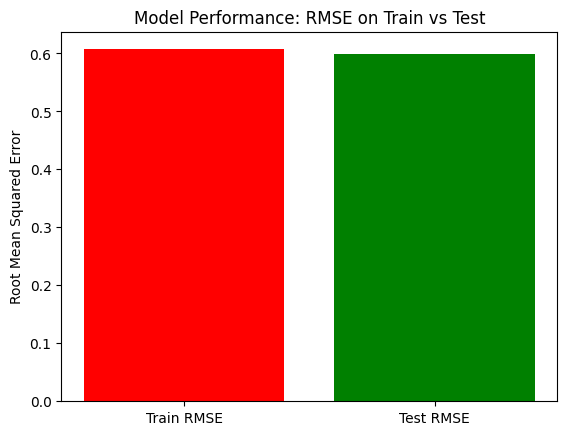

In [228]:
# Plotting the Bar Chart for Linreg Model Performance for Vehicle Dataset
plt.bar(['Train RMSE', 'Test RMSE'], [rmse_train, rmse_test], color=['red', 'green'])
plt.title('Model Performance: RMSE on Train vs Test')
plt.ylabel('Root Mean Squared Error')
plt.show()

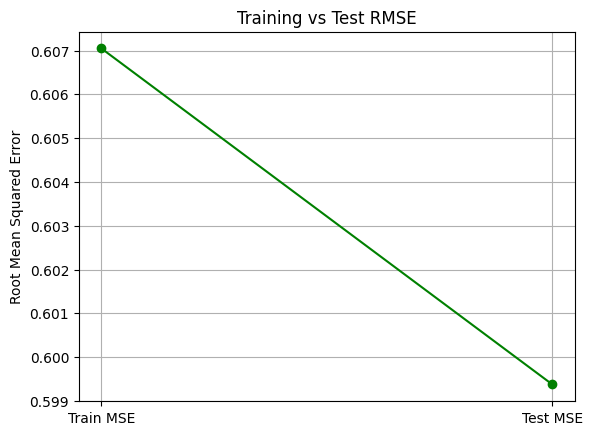

In [229]:
plt.plot(['Train MSE', 'Test MSE'], [rmse_train, rmse_test], marker='o', linestyle='-', color='green')
plt.title('Training vs Test RMSE')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()

In [230]:
# scaling data using Standard scale to be provide for Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [231]:
scaled_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]).fit(X_train, y_train)
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, train_preds)
ridge_test_mse = mean_squared_error(y_test, test_preds)

ridge_train_rmse = np.expm1(np.sqrt(ridge_train_mse))
ridge_test_rmse = np.expm1(np.sqrt(ridge_test_mse))

feature_importance = pd.Series(scaled_pipe.named_steps["ridge"].coef_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False).head(10))
print(f"Train RMSE: {ridge_train_rmse:.2f}")
print(f"Test RMSE: {ridge_test_rmse:.2f}")

results.append({
        "Model": 'Ridge',
        "RMSE train": round(ridge_train_rmse,2),
        "RMSE test": round(ridge_test_rmse,2)
    })

year                   0.186461
transmission_other     0.101769
manufacturer_lexus     0.035607
drive_rwd              0.029980
type_other             0.025529
condition_fair         0.022705
manufacturer_audi      0.022372
transmission_manual    0.018921
manufacturer_tesla     0.018259
manufacturer_ram       0.018211
dtype: float64
Train RMSE: 0.61
Test RMSE: 0.60


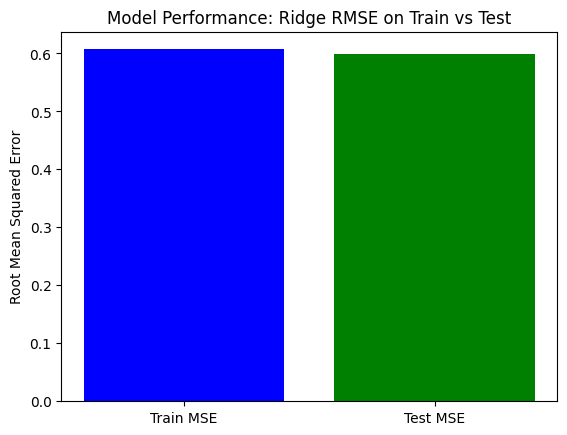

In [232]:
plt.bar(['Train MSE', 'Test MSE'], [ridge_train_rmse, ridge_test_rmse], color=['blue', 'green'])
plt.title('Model Performance: Ridge RMSE on Train vs Test')
plt.ylabel('Root Mean Squared Error')
plt.show()

In [233]:
# Training the data set on Lasso
lasso_pipe = Pipeline([('scaler', StandardScaler()),
                     ('lasso', Lasso(alpha=0.1))])
lasso_pipe.fit(X_train, y_train)
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_

In [234]:
lasso_train_pred=lasso_pipe.predict(X_train)
lasso_test_pred=lasso_pipe.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

lasso_train_rmse = np.expm1(np.sqrt(lasso_train_mse))
lasso_test_rmse = np.expm1(np.sqrt(lasso_test_mse))

print(f"Train MSE: {lasso_train_rmse:.2f}")
print(f"Test MSE: {lasso_test_rmse:.2f}")
print(lasso_pipe.named_steps['lasso'].coef_)

results.append({
        "Model": 'Lasso',
        "RMSE train": round(lasso_train_rmse,2),
        "RMSE test": round(lasso_test_rmse,2)
    })



Train MSE: 0.73
Test MSE: 0.72
[ 0.1086177  -0.38997534  0.         -0.          0.          0.
 -0.          0.         -0.         -0.          0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.05493883 -0.03306216  0.
  0.          0.         -0.          0.         -0.02376425 -0.        ]


In [235]:
# Top Features output based on Lasso Model
lasso_feature_imp = pd.Series(lasso_pipe.named_steps['lasso'].coef_, index=X_train.columns)
lasso_feature_imp.sort_values(ascending=False)

,0
year,0.108618
transmission_other,0.054939
manufacturer_porsche,0.000000
manufacturer_alfa-romeo,0.000000
manufacturer_audi,0.000000
...,...
type_hatchback,-0.000000
type_other,0.000000
type_sedan,-0.023764
drive_fwd,-0.033062


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [236]:
# Consolidating the output of all the Model Results
results_df =pd.DataFrame(results)
results_df

,Model,RMSE train,RMSE test
0,LinearRegression,0.61,0.60
1,Ridge,0.61,0.60
2,Lasso,0.73,0.72


**Observations:**
* Comparing the RMSE Values Linear Regression and Ridge perform almost identically (Train: 0.61, Test: 0.60)
* Lasso Regression seems to show higher error on both train and test (Train: 0.73, Test: 0.72)
* Linear Regression Performs well on both train and test data by minimizing the total squared error between predicted and actual values, requires No regularization but may overfit for complex data.
* Ridge Regression performs similar to Linear Regression and suggests that the model doesn’t get affected by overfitting or multicollinearity and also the regularization did not have any negative or positive effect.
* Lasso Regression did not performs well on this dataset with features selected, might need a tuning on the selection of features.

**Recommendations:**
* Based on the RMSE values, Linear Regression and Ridge Regression perform better on both training and testing datasets with nearly identical results and
we can choose Ridge as it is robust and perform well with the increase in the dataset size and with more outlier recorded in the data.

* Lasso Regression needs some more tuning with addition of other features and can be taken as an Enhancement to the model or the dataset needs to be looked up for relevant features that can be added for the model to perform efficiently

**Final Recommendation:**
* We can use either Linear or Ridge Regression as both fit well and generalize effectively, preferring ridge over linear.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Business Recommendations**
* Vehicle age is a strong indicator for determination of the price of the vehicle.
* Odometer readings affect the price.
* Vehicle condition and drive type has an effect on the resale value.
* Manufacturer and transmission play an important role in suggesting the price of the Vehicle.


| Top Features     | Impact on Pricing|
|--------------|--------------|
| Year | Positive|
| Manufacturer | Positive|
| Drive| Positive|
| Type | Positive|
| Odometer| Negative|